In [58]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import netCDF4 as nc
from library import rand_svd

In [107]:
do_mean_sub = True

# Read in the netcdf files
sst_ds = nc.Dataset('sst.wkmean.1990-present.nc', 'r')
mask_ds = nc.Dataset('lsmask.nc', 'r')

# Get data in numpy arrays
sst = sst_ds['sst'][:].filled().astype(np.float64)
mask = mask_ds['mask'][:].filled().astype(np.float64)

# Transpose to (lat, long, time)
mask = np.transpose(mask, axes=[1,2,0])
sst = np.transpose(sst, axes=[1,2,0])

lat, long, t_span = sst.shape

sst_masked = sst * mask # Apply mask
sst_st = sst_masked.reshape(-1, t_span) # (space, time) matrix
flat_mask = mask.reshape(lat, long)

if do_mean_sub:
    sst_st -= sst_st.mean(axis=0)

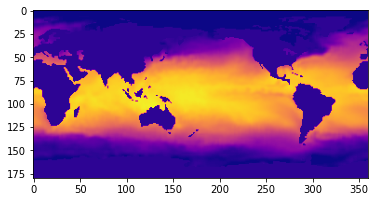

In [109]:
# Plot first time step
plt.imshow(sst_masked[:,:,0], cmap='plasma')
plt.show()

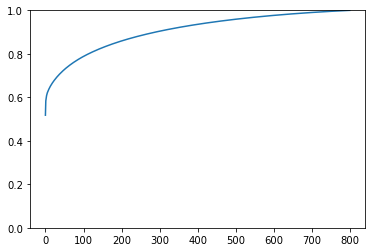

100 :  0.7882744688791515
150 :  0.8286655594353443
200 :  0.8594595036126207
250 :  0.8840358031775433
300 :  0.9043230140378974
350 :  0.9213848964751635
400 :  0.9359427195885046
450 :  0.9484604607659924
500 :  0.959294022534304
550 :  0.9687341980800885
600 :  0.9769770239014155
650 :  0.984158529604355
700 :  0.9903867166471896
750 :  0.9956918461621533


In [108]:
# SVD
r = 800
thresh = 400

u, s, vt = rand_svd(sst_st, r)
cum_energy = np.cumsum(s / s.sum())
plt.plot(cum_energy)
plt.ylim(0,1)
plt.show()

for i in range(100, r, 50):
    print(i, ': ',cum_energy[i])

In [1]:
n = 5

for i in range(n):
    fig, ax = plt.subplots(figsize=(8,4))
    cax = ax.imshow(u[:,i].reshape(lat, long) * flat_mask, cmap='plasma')
    fig.colorbar(cax)
    plt.show()

NameError: name 'plt' is not defined